In [38]:
#для отображения графики в jupyter'e
%matplotlib inline 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
#увеличим размер графиков
rcParams['figure.figsize'] = 11, 7

In [42]:
df = pd.read_csv('Energy_efficiency_Data_Set_preprocessed.csv', decimal=",")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 66.0 KB


In [44]:
df.shape #768 объекта в 10 категориях

(768, 10)

In [46]:
df.isnull().sum() #пропусков в данных нет

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<AxesSubplot:xlabel='X2'>

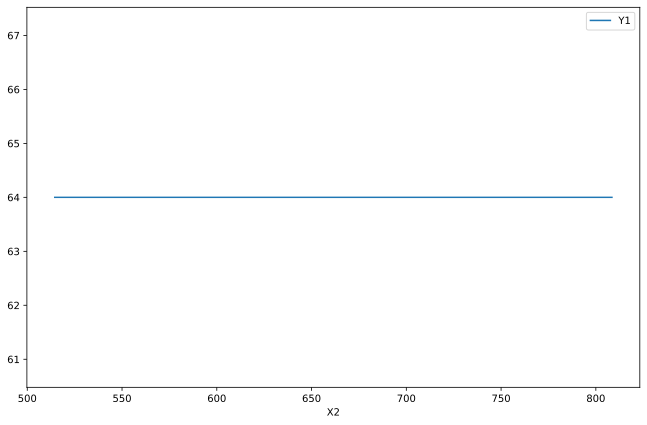

In [47]:
Y1_df = df[[x for x in df.columns if 'Y1' in x] + ['X2']]
Y1_df.groupby('X2').count().plot()

У получившегося DataFrame вызовем функцию plot c параметрами kind='bar', rot=45 для построения ввиде гистограммы, где Y2(Охлаждающая нагрузка), X4(Площадь крыши).

<AxesSubplot:xlabel='X4'>

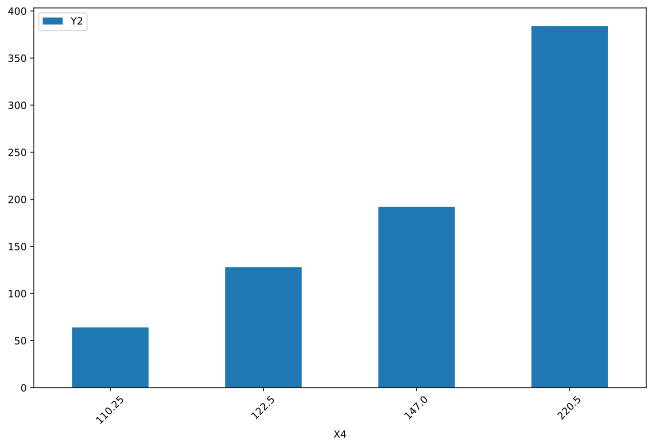

In [48]:
X4_df = df[[x for x in df.columns if 'X4' in x] + ['Y2']]
X4_df.groupby('X4').count().plot(kind='bar', rot=45)

Pair plot (scatter plot matrix). Эта визуализация показывает на картинке, как связаны между собой указанные признаки. 

In [51]:
cols = ['X1', 'X5', 'X7', 'Y1','Y2']
sns_plot = sns.pairplot(df[cols])

С помощью seaborn посмотрим на распределение X5(общая высота). По умолчанию на графике отображается гистограмма и kernel density estimation.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X5', ylabel='Density'>

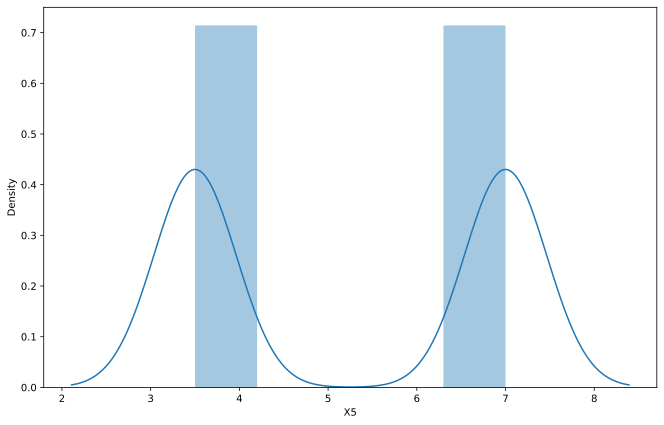

In [52]:
sns.distplot(df.X5)

Box plot состоит из коробки, усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения. Построим распределние Y1 по X6.

<AxesSubplot:xlabel='Y1', ylabel='X6'>

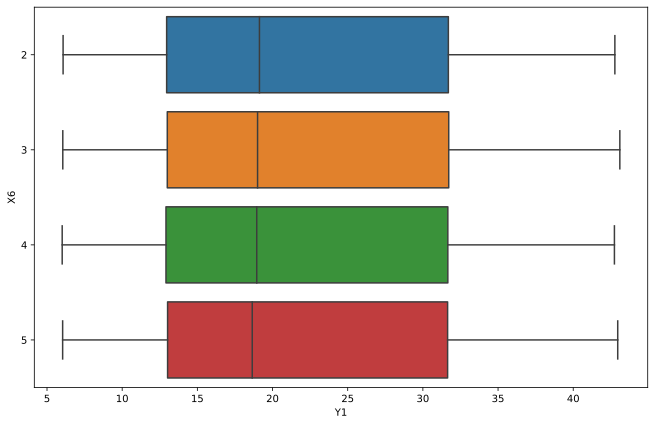

In [53]:
top_X6 = df.X6.value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(y="X6", x="Y1", data=df[df.X6.isin(top_X6)], orient="h")

Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем максимальное значение Y2 по X2 и X7.

<AxesSubplot:xlabel='X2', ylabel='X7'>

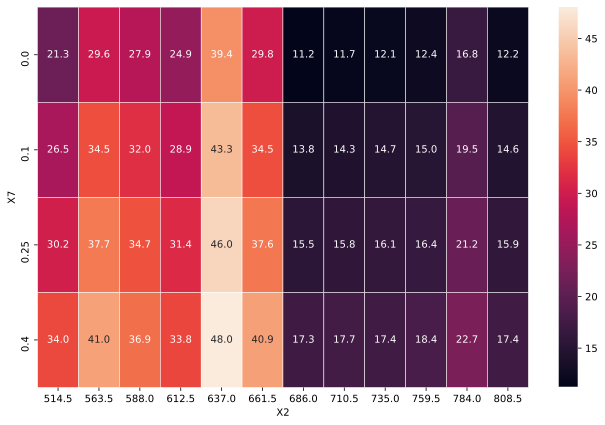

In [55]:
X7_X2_Y2 = df.pivot_table(
                        index='X7', 
                        columns='X2', 
                        values='Y2', 
                        aggfunc=max).fillna(0).applymap(float)
sns.heatmap(X7_X2_Y2, annot=True, fmt=".1f", linewidths=.5)